#### PRELIMINARY OPERATIONS
- This is step we import all the necessary libraries

In [1]:
# inspecting the work space

import os
work_space = os.getcwd() 
work_space 

'/Users/apple/Downloads'

In [2]:
import tensorflow as tf
%matplotlib inline
import numpy as np  
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from IPython.display import display, clear_output

#### Installing COSMOPOWER
- CosmoPower can be conveniently pip-installed from PyPI.

In [3]:
!pip install cosmopower

#### Cosmological parameters and its values

- Getting dataset

In [4]:
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.runtime.config import Inifile
import numpy as np
import pandas as pd

#### Running cosebis cosmois Pipeline to Generate E_modes
- These Emodes are what we going to emulate using cosmopower

In [5]:
# N:B The start vector for params_fiducial was all set at the middle point 

#################################################
# Read in the cosmosis configuration file pipeline.ini 
inifile = 'pipeline11.ini'
ini = Inifile(inifile) 
#################################################

##################################################
# (optional) You can change things or read from ini: 

# set the value of MY_PATH in the [DEFAULT] section to /Users/username/Documents/repos/
# ini.set("DEFAULT","MY_PATH","/Users/username/Documents/repos/")

# get the value of modules in the [pipeline] section
# ini.get("pipeline","modules")

# ini.set("pipeline","modules","sample_S8 sigma8toAs camb")
####################################################

####################################################
# setup the pipeline and give it the ini values
pipeline = LikelihoodPipeline(ini)
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params


# # You can modify which parameters you vary or fix
# pipeline.set_varied("cosmological_parameters", "omch2", 0.2, 0.4)
# pipeline.set_fixed("cosmological_parameters", "h0", 0.72) 

Loading number density data from /Users/apple/Downloads//cosebis_KIDS1000_BlindC_with_m_bias_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_goldclasses_Flag_SOM_Fid.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 5 bins
        Putting n(0) = 0 at the start of the n(z)
Calculating Limber: Kernel 1 = ('F', 'source'), Kernel 2 = ('F', 'source'), P_3D = MatterPower3D  --> Output: shear_cl
Will project these spectra into 2D:
    -  shear_cl




*********in COSEBIs interface setup*********

Could not load input_section_name to COSEBIs,setting to default: shear_cl
got the value of output_section_name:cosebis
Caluclating E-modes
got the value of theta_min=0.5
got the value of theta_max=300
got the value of n_max=5
not using c_term correction
WnLog folder name is:/Users/apple/Downloads//WnLog/
Root and Norms folder name is:/Users/apple/Downloads//cosebis_cosmosis//TLogsRootsAndNorms/
T_pm folder name is:/Users/apple/Downloads//cosebis_cosmosis//TpnLog/
in COSEBIs initialize
setting En parameters in COSEBIs
nMaximum=5
theta_min=0.000145444
theta_max=0.0872665
Wn not set setting now:
setting thetamin,thetamax,nMax
nMax=5
reading T1  roots	reading T1  normalization
reading T2  roots	reading T2  normalization
reading T3  roots	reading T3  normalization
reading T4  roots	reading T4  normalization
reading T5  roots	reading T5  normalization
set order of WnLog
LLOW=0 LHIGH=11.6491 NLBINS=1000000
log [0,11.6491] N=1000000)
set order of

Setup all pipeline modules
Module timing:
sample_S8 0.023208
sigma8toAs 0.019191
camb 0.017314
load_nz_fits 0.828013
extrapolate_power 0.019318
linear_alignment 0.018653
projection 0.019951
cosebis 11.428584

Parameter Priors
----------------
cosmological_parameters--omch2      ~ U(0.051, 0.255)
cosmological_parameters--ombh2      ~ U(0.019, 0.026)
cosmological_parameters--h0         ~ U(0.64, 0.82)
cosmological_parameters--n_s        ~ U(0.84, 1.1)
cosmological_parameters--s_8_input  ~ U(0.1, 1.3)
cosmological_parameters--omega_k    ~ delta(0.0)
cosmological_parameters--w          ~ delta(-1.0)
cosmological_parameters--wa         ~ delta(0.0)
cosmological_parameters--mnu        ~ delta(0.06)
halo_model_parameters--logt_agn     ~ U(7.6, 8.0)
intrinsic_alignment_parameters--a   ~ U(-6.0, 6.0)

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.440 seconds
camb took: 4.561 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.169 seconds
linear_alignment took: 0.052 seconds
pr

In [6]:
print(th_all)

[6.10161452e-11 7.06184838e-11 4.85104231e-11 2.92385905e-11
 1.90692189e-11 7.39688929e-11 8.41882480e-11 5.50322205e-11
 3.36053154e-11 2.48118394e-11 6.66847289e-11 7.55337857e-11
 4.66804347e-11 2.75998088e-11 2.25960002e-11 6.36605747e-11
 7.17718723e-11 4.22629276e-11 2.40654313e-11 2.14142548e-11
 6.45868615e-11 7.26807068e-11 4.22358427e-11 2.34640061e-11
 2.11479444e-11 2.85354133e-10 3.19945322e-10 2.38260551e-10
 1.69857164e-10 1.08337902e-10 3.48061049e-10 3.89916501e-10
 2.93950310e-10 2.12743232e-10 1.34604979e-10 3.96374784e-10
 4.43429590e-10 3.36840640e-10 2.47970631e-10 1.57734303e-10
 4.10633120e-10 4.59126457e-10 3.49314446e-10 2.58429651e-10
 1.64843788e-10 6.09039226e-10 6.89191312e-10 5.36858883e-10
 3.77427857e-10 2.16383583e-10 8.33132336e-10 9.46276855e-10
 7.46010831e-10 5.20305155e-10 2.88132548e-10 9.02674071e-10
 1.02639865e-09 8.12388307e-10 5.67048289e-10 3.12239623e-10
 1.37057441e-09 1.56334562e-09 1.23275250e-09 8.18920621e-10
 4.15973789e-10 1.588533

In [7]:
## List of varied cosmological parameters
param_names_varied

[cosmological_parameters--omch2,
 cosmological_parameters--ombh2,
 cosmological_parameters--h0,
 cosmological_parameters--n_s,
 cosmological_parameters--s_8_input,
 halo_model_parameters--logt_agn,
 intrinsic_alignment_parameters--a]

##### `For the course of the research, i will be fix the value for Halo_model and intrinsic_A`

In [8]:
pipeline.set_fixed("halo_model_parameters", "logt_agn", 2.6) 
pipeline.set_fixed("intrinsic_alignment_parameters", "a", 1)

In [9]:
# List cosmological parameter with fixed value
param_names_fixed = pipeline.fixed_params
param_names_fixed 

[cosmological_parameters--omega_k,
 cosmological_parameters--w,
 cosmological_parameters--wa,
 cosmological_parameters--mnu,
 halo_model_parameters--logt_agn,
 intrinsic_alignment_parameters--a]

In [10]:
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.546 seconds
camb took: 4.083 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.061 seconds
linear_alignment took: 0.005 seconds
projection took: 0.627 seconds
cosebis took: 0.535 seconds
Total pipeline time: 5.87 seconds
Pipeline ran okay.


In [11]:
print(th_all)

[6.10161452e-11 7.06184838e-11 4.85104231e-11 2.92385905e-11
 1.90692189e-11 7.39688929e-11 8.41882480e-11 5.50322205e-11
 3.36053154e-11 2.48118394e-11 6.66847289e-11 7.55337857e-11
 4.66804347e-11 2.75998088e-11 2.25960002e-11 6.36605747e-11
 7.17718723e-11 4.22629276e-11 2.40654313e-11 2.14142548e-11
 6.45868615e-11 7.26807068e-11 4.22358427e-11 2.34640061e-11
 2.11479444e-11 2.85354133e-10 3.19945322e-10 2.38260551e-10
 1.69857164e-10 1.08337902e-10 3.48061049e-10 3.89916501e-10
 2.93950310e-10 2.12743232e-10 1.34604979e-10 3.96374784e-10
 4.43429590e-10 3.36840640e-10 2.47970631e-10 1.57734303e-10
 4.10633120e-10 4.59126457e-10 3.49314446e-10 2.58429651e-10
 1.64843788e-10 6.09039226e-10 6.89191312e-10 5.36858883e-10
 3.77427857e-10 2.16383583e-10 8.33132336e-10 9.46276855e-10
 7.46010831e-10 5.20305155e-10 2.88132548e-10 9.02674071e-10
 1.02639865e-09 8.12388307e-10 5.67048289e-10 3.12239623e-10
 1.37057441e-09 1.56334562e-09 1.23275250e-09 8.18920621e-10
 4.15973789e-10 1.588533

## Aim: To train a cosmopower to emulate the theory vector `th_all` 
### Step_1: 
- Set all the Cosmological parameter to the lowest number and observe the Thoeretical_value(th_all)
* In a bid to monitor the progress 5 cosmological value will be changed, both and halo and instrinsic alig will remain

In [12]:
# Get the fiducial values
params_fiducial_1 = [0.051,0.019,0.64,0.84,0.1] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_1)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_1=th.copy()
			else:
				th_all_1=np.hstack((th_all_1,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.533 seconds
camb took: 5.079 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.061 seconds
linear_alignment took: 0.005 seconds
projection took: 0.702 seconds
cosebis took: 0.532 seconds
Total pipeline time: 6.91 seconds
Pipeline ran okay.


In [13]:
# Discover that the th_all_1 changed because we passed in new values for params_fiducial_1

print(th_all_1)

[1.58095686e-13 2.96564098e-13 3.46345262e-13 2.92921996e-13
 1.93762900e-13 1.68529015e-13 3.27091935e-13 3.98176073e-13
 3.51377409e-13 2.41641000e-13 1.31768161e-13 2.63133573e-13
 3.31324359e-13 3.02416968e-13 2.14413277e-13 1.47656710e-13
 2.87045929e-13 3.51140319e-13 3.11943788e-13 2.15511983e-13
 1.98659768e-13 3.66853332e-13 4.22933007e-13 3.55355276e-13
 2.35112377e-13 1.42101531e-12 2.60888391e-12 2.95601807e-12
 2.41044084e-12 1.53155502e-12 1.90903521e-12 3.49845246e-12
 3.95288596e-12 3.21155245e-12 2.03183481e-12 2.26158872e-12
 4.15564964e-12 4.71003264e-12 3.83869722e-12 2.43639150e-12
 2.38474031e-12 4.38008620e-12 4.96239100e-12 4.04384850e-12
 2.56843170e-12 4.48251908e-12 8.00121721e-12 8.73509724e-12
 6.82912987e-12 4.15874892e-12 6.88395676e-12 1.21967974e-11
 1.31825570e-11 1.01857905e-11 6.12558056e-12 7.72478560e-12
 1.36675985e-11 1.47461120e-11 1.13732816e-11 6.83043396e-12
 1.34687530e-11 2.33791114e-11 2.45476992e-11 1.82705397e-11
 1.04680514e-11 1.660845

### Step:2 
- Set the Cosmological Parameter omhch2 to `0.1157` and let other remain 
* Monitor the th_all

In [14]:
# pipeline = LikelihoodPipeline(ini)



# Get the fiducial values
params_fiducial_2 = [0.1157,0.019,0.64,0.84,0.1] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_2)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_2=th.copy()
			else:
				th_all_2=np.hstack((th_all_2,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.418 seconds
camb took: 4.783 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.079 seconds
linear_alignment took: 0.005 seconds
projection took: 0.734 seconds
cosebis took: 0.606 seconds
Total pipeline time: 6.63 seconds
Pipeline ran okay.


In [15]:
# N:B Values of the th_all_2 changes because different values was passed for the params_fiducial_2

print(th_all_2)  

[ 3.74101931e-13  6.63429508e-13  7.20473707e-13  5.61560739e-13
  3.41886901e-13  3.38465016e-13  6.43446828e-13  7.58507336e-13
  6.40720615e-13  4.17060612e-13  1.70035939e-13  3.83659295e-13
  5.30308321e-13  5.07788244e-13  3.60846148e-13  6.40129063e-14
  2.19259634e-13  3.85413557e-13  4.23601459e-13  3.25817730e-13
 -8.05417955e-09  1.32374153e-08 -1.69306219e-08  2.02780294e-08
 -2.34108489e-08  2.59122322e-12  4.43880739e-12  4.58607599e-12
  3.35884524e-12  1.90766212e-12  3.20105701e-12  5.49437203e-12
  5.68429619e-12  4.16138115e-12  2.35614377e-12  3.59987471e-12
  6.23714081e-12  6.52180974e-12  4.82101852e-12  2.74828715e-12
  3.70334330e-12  6.43783289e-12  6.75794891e-12  5.01451203e-12
  2.86755905e-12  6.62154918e-12  1.08727241e-11  1.05975612e-11
  7.24484244e-12  3.84072976e-12  9.45793211e-12  1.53654484e-11
  1.47439267e-11  9.87934846e-12  5.12374696e-12  1.02857342e-11
  1.67085519e-11  1.60229924e-11  1.07209992e-11  5.54636016e-12
  1.69161480e-11  2.65977

### Step 3
- return `omch2` back to `0.051` and set `ombh2` to `0.0255` 
- Check the th_all while other parameter remain the same

In [16]:
# pipeline = LikelihoodPipeline(ini)


# Get the fiducial values
params_fiducial_3 = [0.051,0.0225,0.64,0.84,0.1] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_3)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_3=th.copy()
			else:
				th_all_3=np.hstack((th_all_3,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.507 seconds
camb took: 10.912 seconds
load_nz_fits took: 0.018 seconds
extrapolate_power took: 0.179 seconds
linear_alignment took: 0.007 seconds
projection took: 1.177 seconds
cosebis took: 1.220 seconds
Total pipeline time: 14.0 seconds
Pipeline ran okay.


In [17]:
# N:B Values of the th_all_3 changes because different values was passed for the params_fiducial_2


print(th_all_3)

[1.64301576e-13 3.08524769e-13 3.60701511e-13 3.05443604e-13
 2.02380229e-13 1.70563304e-13 3.31719120e-13 4.04661430e-13
 3.57840825e-13 2.46597272e-13 1.27278437e-13 2.56137188e-13
 3.25084396e-13 2.98750678e-13 2.12851509e-13 1.37700111e-13
 2.70383288e-13 3.34233234e-13 2.99389727e-13 2.07622952e-13
 1.87087594e-13 3.47722403e-13 4.03902608e-13 3.41725091e-13
 2.27219550e-13 1.46750575e-12 2.69806180e-12 3.06267326e-12
 2.50308009e-12 1.59465172e-12 1.96161577e-12 3.60113383e-12
 4.07841122e-12 3.32332204e-12 2.11018827e-12 2.31339878e-12
 4.26012929e-12 4.84285485e-12 3.96249124e-12 2.52821338e-12
 2.43462610e-12 4.48265721e-12 5.09575566e-12 4.17135289e-12
 2.66601479e-12 4.61493213e-12 8.25639816e-12 9.04246054e-12
 7.09805190e-12 4.34257456e-12 7.07238889e-12 1.25627163e-11
 1.36260081e-11 1.05731925e-11 6.38482205e-12 7.92311079e-12
 1.40570971e-11 1.52238531e-11 1.17945961e-11 7.11267720e-12
 1.38218838e-11 2.40470471e-11 2.53188755e-11 1.88865306e-11
 1.08123614e-11 1.700925

## GENERATING DATASET 
### `Latin hypercube sampling`  and `Monte Carlo Sampling`
* To generate my dataset i will be compare `Monte Carlo Sampling` to `Latin Hypercube sample` and i will be using `LHS` for some obvious reasons. 
- 1. `LHS` generate new random sample from equal probablity within samples using normal distribution hence the samples are not over-laid with each other

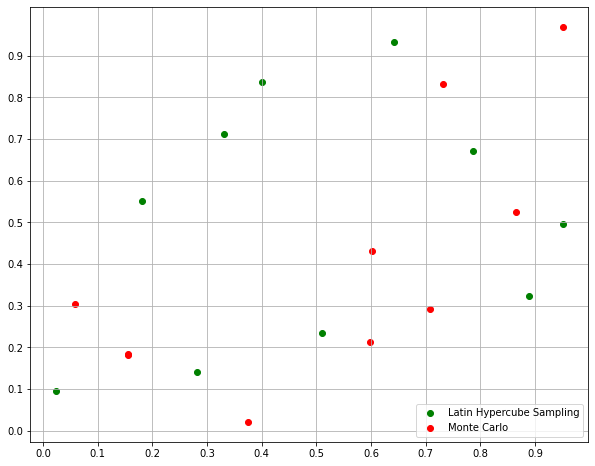

In [18]:
import lhsmdu
# Monte Carlo sampling
l = lhsmdu.createRandomStandardUniformMatrix(2, 10)

# Latin Hypercube Sampling with multi-dimensional uniformity
k = lhsmdu.sample(2, 10) 

# Converting to numpy array
k = np.array(k)
l = np.array(l)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
plt.scatter(k[0], k[1], color="g", label="Latin Hypercube Sampling")
plt.scatter(l[0], l[1], color="r", label="Monte Carlo")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [19]:
import matplotlib.pyplot as plt
def Plot_CV_Inacc(coords,labels,limits):
        
        import matplotlib.gridspec as gridspec
        if labels == None or len(labels) != coords.shape[1]:
            new_labels = []
            for i in range(coords.shape[0]):
                new_labels.append('X%s'%i)
            labels = new_labels

        

        fig = plt.figure(figsize = (10,10)) #figsize = (20,14)
        gs1 = gridspec.GridSpec(coords.shape[1]-1,coords.shape[1]-1)
        p=0	# subplot number
        for i in range(coords.shape[1]-1):
            l=i+1 # which y-axis statistic is plotted on each row.	
            for j in range(coords.shape[1]-1):
                ax1 = plt.subplot(gs1[p])
                if j>i:
                    ax1.axis('off')
                else:
                    ax1.scatter(coords.iloc[:,j], coords.iloc[:,l], color='red',s=20)
                    color_idx=0
                    for s in range(coords[120:].shape[0]): 
                            ax1.scatter(coords.iloc[s,j], coords.iloc[s,l], color= 'blue', s=20 )
                            color_idx+=1

                    # Decide what the axis limits should be. If limits=None, it doesn't set any.
                    # If limits is [a,b], limits are set to be a*min and b*max in each dimension.
                    # Else, limits is interpreted as [ [x1,x2],[y1,y2],[z1,z2]...] for each dimension. 
                    if limits != None:
                        
                        ax1.set_xlim([ limits[j][0],limits[j][1] ]) 
                        ax1.set_ylim([ limits[l][0],limits[l][1] ])
                   


                    if j==0:
                        ax1.set_ylabel(labels[l])
                    else:
                        ax1.set_yticks([])
                    if i==coords.shape[1]-2:
                        ax1.set_xlabel(labels[j])
                    else:				
                        ax1.set_xticks([])
                p+=1
        fig.suptitle(r'Latin hypercube sampling of 150 Datasets' )
plt.show()

In [20]:
labels = ["omch2", "ombh2", "h0", "n_s", "s8_input"]
limits = [[0.051,0.255], [0.019, 0.026], [0.64, 0.82], [0.84, 1.1], [0.1, 1.3]] 

In [21]:
# Importing the require library
from scipy.stats import qmc

sample = list()

def latin_hypercube_sampling():
    """This function is created to generated random sample of data
    using Latin Hypercube Sample method to reduce noise and generate unique
    data with the limit of each cosmological parameter"""
    
    # calling the modules LatinHyperCube from QMC for (D is the number of parameters, n: number of sample)
    s = qmc.LatinHypercube(d = 5)
    sam = s.random(n=150) 
    
    # setting up limit for the 7 cosmological hyperparameter 
    lower_limit = [0.051, 0.019, 0.64, 0.84, 0.1 ]
    upper_limit = [0.255, 0.026, 0.82, 1.1, 1.3,] 
    
    lhs=qmc.scale(sam, lower_limit, upper_limit) 
    
    # Appending the list within the limit 
    sample.append(lhs)
latin_hypercube_sampling()  

In [22]:
sample = sample[0]
sample_ = sample.tolist() 

##### Preparing Training parameters
- The below cell shows preparation of cosmological training parameters

In [23]:
df = pd.DataFrame(sample_,columns=['omch2', 'ombh2', 'h0','n_s', 's8_input'] ) 

# # Saving the output
# df.to_csv("cosmosis_project_dataset.csv")

# # Loading the dataset
df = pd.read_csv("cosmosis_project_dataset.csv")  
df.head() 

,omch2,ombh2,h0,n_s,s8_input
0,0.220391,0.019162,0.669431,0.861554,0.211966
1,0.099775,0.021219,0.659530,0.844513,0.725137
2,0.058208,0.024394,0.699565,1.076392,0.941000
3,0.193736,0.021120,0.692335,1.099584,1.169523
4,0.180244,0.025190,0.772035,0.957957,0.392173


In [24]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (150, 5)


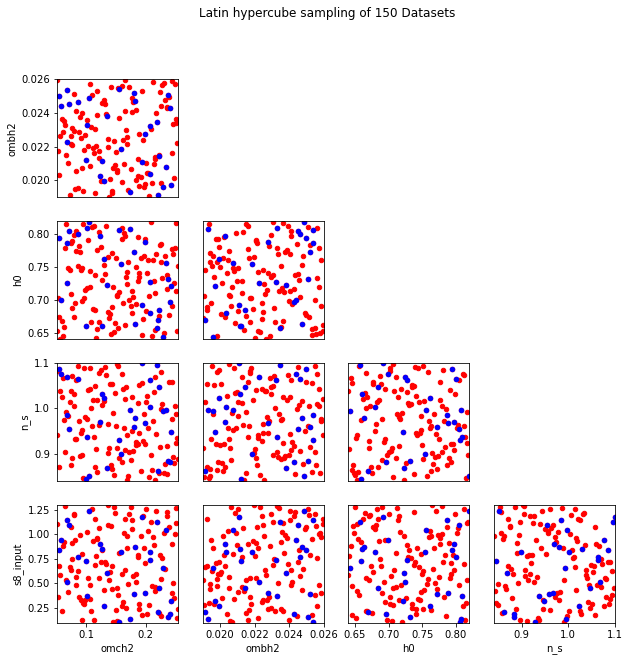

In [25]:
Plot_CV_Inacc(df,labels,limits) 

#### Data overview
- This is the chart of all the cosmological parameter plotted against each other

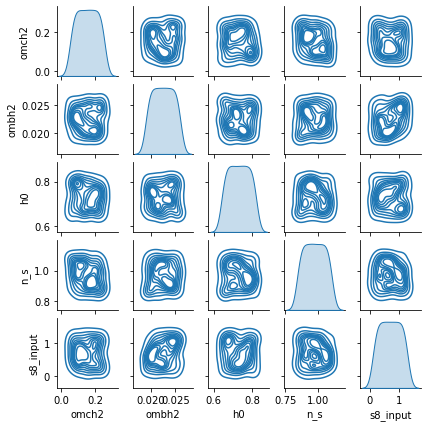

In [26]:
data_overview = sns.pairplot(df,height=1.2,kind='kde')

### TRAINING DATA DOWNLOAD
#### Splitting The dataset to Train/Test
- 400 samples of our LHS(Latin Hypercube sample) data will be used for train and 100 samples will be used for testing. i.e 80:20 train/test ratio
* Bellow cell inidcate the process 

In [27]:
x_label_N = df[0:120]

# Saving the parameters into dict of np.array for each key of the cosmological parameters
from numpy import savez_compressed 
savez_compressed("training_parameters.npz", **x_label_N) 

In [28]:
# Loading/Reading the saved file
training_parameters  = np.load("training_parameters.npz",allow_pickle=True) 

training_parameters is a dict of np.arrays. There is a dict key for each of the parameters the emulator is going to be trained on:

In [29]:
print("Cosmological Paramters in the training set are: ", training_parameters.files)

Cosmological Paramters in the training set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input']


N:B Each of these keys has an associated np.array of values. The length of these arrays is the number of training samples in that file

In [30]:
print(training_parameters['omch2'])
print('number of training samples: ', len(training_parameters['omch2'])) # same for all of the other parameters

[0.220391   0.099775   0.05820834 0.19373635 0.18024444 0.05500212
 0.24235922 0.06837195 0.17378237 0.22928979 0.21870162 0.2076038
 0.10407822 0.24099632 0.23773051 0.15598465 0.18174347 0.08723183
 0.12367397 0.19969356 0.10163699 0.22297732 0.06730389 0.07109142
 0.2343602  0.13486425 0.12966759 0.15826896 0.12649271 0.20673465
 0.14374739 0.17916763 0.15184103 0.07705056 0.13654309 0.11008901
 0.20126509 0.1844753  0.16926432 0.11219478 0.14841081 0.0600142
 0.21623178 0.23075364 0.22375588 0.2393647  0.07405241 0.11495571
 0.24872407 0.22832713 0.19870981 0.19238995 0.17754923 0.0566148
 0.08049094 0.14738347 0.17261059 0.11686007 0.06438484 0.21389998
 0.16603873 0.16318531 0.16510564 0.05515664 0.195797   0.24632232
 0.14346379 0.15501156 0.06586209 0.10105841 0.13137188 0.07501503
 0.05102931 0.16771088 0.21270804 0.15332507 0.25316174 0.1273688
 0.17580228 0.25435869 0.09132803 0.0692172  0.2024182  0.11900379
 0.15955875 0.09475264 0.1381472  0.23639469 0.08563251 0.11444861

## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our training parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 400 samples hence

In [31]:
# Converting to list
training_feature = x_label_N.values.tolist()   

In [32]:
%%time
# Passing the list of the training features to generate cosebis emodes for the 120 samples 

final_list = list() 
for values in training_feature:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.815 seconds
camb took: 11.250 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.666 seconds
cosebis took: 0.776 seconds
Total pipeline time: 13.6 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.531 seconds
camb took: 4.899 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.679 seconds
cosebis took: 0.566 seconds
Total pipeline time: 6.74 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.456 seconds
camb took: 6.130 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.822 seconds
cosebis took: 0.572 seconds
Total pipeline time: 8.06 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.356 seconds
camb took: 6.679 sec

/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.652 seconds
cosebis took: 0.524 seconds
Total pipeline time: 7.2 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.848 seconds
camb took: 6.710 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.836 seconds
cosebis took: 0.654 seconds
Total pipeline time: 9.12 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.481 seconds
camb took: 4.959 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.073 seconds
linear_alignment took: 0.008 seconds
projection took: 0.789 seconds
cosebis took: 0.566 seconds
Total pipeline time: 6.88 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.373 seconds
camb took: 6.050 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.091 seconds
linear_alignment took: 0.008 seconds
projection took: 1.542 seconds
cosebis took: 0.719 seconds
Total pipeline time: 8.7

projection took: 0.752 seconds
cosebis took: 0.551 seconds
Total pipeline time: 8.35 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.313 seconds
camb took: 7.032 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.105 seconds
linear_alignment took: 0.008 seconds
projection took: 0.967 seconds
cosebis took: 0.695 seconds
Total pipeline time: 9.12 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.745 seconds
camb took: 5.790 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.005 seconds
projection took: 1.412 seconds
cosebis took: 1.326 seconds
Total pipeline time: 9.35 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.444 seconds
camb took: 5.611 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.088 seconds
linear_alignment took: 0.007 seconds
projection took: 0.745 seconds
cosebis took: 0.572 seconds
Total pipeline time: 7.

projection took: 0.615 seconds
cosebis took: 0.742 seconds
Total pipeline time: 7.6 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.526 seconds
camb took: 4.803 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.070 seconds
linear_alignment took: 0.006 seconds
projection took: 0.633 seconds
cosebis took: 0.582 seconds
Total pipeline time: 6.62 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.372 seconds
camb took: 4.583 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.062 seconds
linear_alignment took: 0.005 seconds
projection took: 1.083 seconds
cosebis took: 0.620 seconds
Total pipeline time: 6.73 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.375 seconds
camb took: 4.727 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.006 seconds
projection took: 0.612 seconds
cosebis took: 0.553 seconds
Total pipeline time: 6.3

projection took: 0.621 seconds
cosebis took: 0.528 seconds
Total pipeline time: 6.26 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.316 seconds
camb took: 4.122 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.061 seconds
linear_alignment took: 0.005 seconds
projection took: 0.669 seconds
cosebis took: 0.532 seconds
Total pipeline time: 5.71 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.283 seconds
camb took: 4.733 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.005 seconds
projection took: 0.950 seconds
cosebis took: 0.564 seconds
Total pipeline time: 6.61 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.309 seconds
camb took: 4.113 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.062 seconds
linear_alignment took: 0.005 seconds
projection took: 0.623 seconds
cosebis took: 0.522 seconds
Total pipeline time: 5.

#### Preparing the cosebis_Emodes 
- Below cell shows the how the generated output from cosebis cosmosis were prepared for training process
- BEFORE STANDARDIZATION 

In [33]:
COSEBIs_E_modes = []
for i in final_list:
    if len(i) == 75:
        COSEBIs_E_modes.append(i)
         
len(COSEBIs_E_modes) 

120

In [34]:
COSEBIs_E_modes = pd.Series(data=COSEBIs_E_modes) 
COSEBIs_E_modes = pd.DataFrame({"features" : np.array(COSEBIs_E_modes), 
                                         "modes" : list(range(0,120)) })  

In [35]:
COSEBIs_E_modes 

,features,modes
0,"[3.6448810161569504e-12, 5.665098371831611e-12...",0
1,"[4.248278397430174e-11, 5.1993601981455694e-11...",1
2,"[7.31937672427614e-11, 8.607517522948973e-11, ...",2
3,"[2.076348120216598e-10, 2.1836906296868896e-10...",3
4,"[1.0520151601780067e-11, 1.3830619912347058e-1...",4
...,...,...
115,"[4.307727047110594e-13, 7.465353580774116e-13,...",115
116,"[1.94391515879391e-12, 3.0876571966446895e-12,...",116
117,"[3.2276153261185857e-12, 5.070965868752608e-12...",117
118,"[6.67227013975107e-12, 9.159030763392138e-12, ...",118


In [36]:
### Saving the cosebis_Emodes 
training_COSEBIs_E_modes = COSEBIs_E_modes.to_dict(orient="list")  
savez_compressed("training_COSEBIs_E_modes.npz", **training_COSEBIs_E_modes) 

In [37]:
### Loading/Reading Cosebis

training_COSEBIs_E_modes = np.load("training_COSEBIs_E_modes.npz", allow_pickle=True)  

In [38]:
training_COSEBIs_E_modes.files

['features', 'modes']

In [39]:
len(training_COSEBIs_E_modes["features"])

120

In [40]:
COSEBIs_E_modes = training_COSEBIs_E_modes["features"]

In [41]:
print(training_COSEBIs_E_modes["features"])

[[3.64488102e-12 5.66509837e-12 5.46170223e-12 ... 1.20805922e-10
  5.68788821e-11 2.09461311e-11]
 [4.24827840e-11 5.19936020e-11 3.84853913e-11 ... 1.74536242e-09
  1.14880310e-09 5.73620111e-10]
 [7.31937672e-11 8.60751752e-11 5.53014255e-11 ... 2.16906556e-09
  1.58800790e-09 9.13025425e-10]
 ...
 [3.22761533e-12 5.07096587e-12 4.91582032e-12 ... 1.10185322e-10
  5.22768717e-11 1.93802010e-11]
 [6.67227014e-12 9.15903076e-12 8.39630524e-12 ... 2.32958978e-10
  1.14701921e-10 4.46499272e-11]
 [1.67496059e-11 2.01313432e-11 1.63266001e-11 ... 4.66447124e-10
  2.34151473e-10 9.04157769e-11]]


In [42]:
COSEBIs_E_modes.min()

-6.050032102520242e-09

In [43]:
COSEBIs_E_modes.max()

6.153778155153893e-09

#### AFTER STANDARDIZATION
- This is done to rational our COSEBIs Emodes to reduce the accuracy loss 

In [44]:
# We are going to use variable COSEBIs declare here to train our cosmopower 

# N:B Weed to ratio our model by divide it with the start_vector theory value (Standardization)
COSEBIs =training_COSEBIs_E_modes['features']/ th_all       
print('(number of training samples, number of ell modes): ', COSEBIs.shape) 

(number of training samples, number of ell modes):  (120, 75)


In [45]:
COSEBIs.max()

226.28159708315565

In [46]:
COSEBIs.min()

-282.5235881374041

## TESTING DATA
- The files for the `testing samples` have the same type of content
- N:B we are using 100 samples to test our model after training

In [47]:
# Declaring the Testing parameters
test_parameters = df[120:150]   

### Preparing the `test_params` just as i did for training parameters
- Aim is to have the dict and key same as training_parameters, each key 🔑 contain np.array of respective cosmological parameters

In [48]:
test_params_dict = test_parameters.to_dict(orient="list") 

# Saving the test_params_dict
savez_compressed("test_params.npz", **test_params_dict) 

In [49]:
#Loading/Reading of test_params
test_params = np.load("test_params.npz",allow_pickle=True ) 

In [50]:
test_params.files

['omch2', 'ombh2', 'h0', 'n_s', 's8_input']

In [51]:
print(test_params['omch2'])
print('number of training samples: ', len(test_params['omch2'])) # same for all of the other parameters

[0.12145903 0.09836821 0.07235803 0.21091453 0.25119865 0.06278082
 0.23272853 0.05237926 0.18697859 0.08137353 0.25080038 0.21538568
 0.16076458 0.23580933 0.14951625 0.24520401 0.13756956 0.18919497
 0.14001648 0.09019114 0.20879807 0.13357753 0.20576829 0.08813169
 0.21726472 0.09602111 0.12542924 0.18751257 0.11840026 0.2436808 ]
number of training samples:  30


In [52]:
print("Cosmological Paramters in the test set are: ", test_params.files)

Cosmological Paramters in the test set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input']


## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our test parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 100 samples hence

In [53]:
# Creating testing parameters
test_set = test_parameters.values.tolist() 

In [54]:
%%time

# Passing the list of the training features to generate cosebis emodes for the 120 samples 


final_list = list() 
for values in test_set:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0 
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.619 seconds
camb took: 4.789 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.062 seconds
linear_alignment took: 0.005 seconds
projection took: 0.687 seconds
cosebis took: 0.535 seconds
Total pipeline time: 6.7 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.374 seconds
camb took: 5.154 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.079 seconds
linear_alignment took: 0.006 seconds
projection took: 0.888 seconds
cosebis took: 0.660 seconds
Total pipeline time: 7.16 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.523 seconds
camb took: 5.389 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.743 seconds
cosebis took: 0.537 seconds
Total pipeline time: 7.27 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.292 seconds
camb took: 4.645 secon

/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.605 seconds
cosebis took: 0.527 seconds
Total pipeline time: 6.06 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.362 seconds
camb took: 4.070 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.060 seconds
linear_alignment took: 0.005 seconds
projection took: 0.702 seconds
cosebis took: 0.536 seconds
Total pipeline time: 5.74 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.276 seconds
camb took: 5.409 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.907 seconds
cosebis took: 0.534 seconds
Total pipeline time: 7.2 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.374 seconds
camb took: 4.098 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.654 seconds
cosebis took: 0.535 seconds
Total pipeline time: 5.7

#### Preparing the Testing cosebis_Emodes 
###### Before Standardization
- Below cell shows the how the generated output from cosebis cosmosis were prepared for testing process 

In [55]:
# Filtering: Appending all the length of np. array at full node for all the bins of all 5 Redshift
testing_COSEBIs_E_modes = []
for i in final_list: 
    if len(i) == 75:
        testing_COSEBIs_E_modes.append(i)
        
len(testing_COSEBIs_E_modes)

30

#### AFTER STANDARDIZATION

In [56]:
# Again, we need to divide our cosebis output by the start _vector theory values as we did for training (Standardization)
testing_COSEBIs = testing_COSEBIs_E_modes/th_all

In [57]:
testing_COSEBIs

array([[1.76848913, 1.72439605, 1.56310314, ..., 1.38907338, 1.51064458,
        1.6946816 ],
       [0.07088679, 0.08723774, 0.12209483, ..., 0.18512086, 0.1794656 ,
        0.1797552 ],
       [0.43925927, 0.44051455, 0.43008119, ..., 0.66388452, 0.73341914,
        0.81750694],
       ...,
       [1.09434101, 1.05296299, 1.05825298, ..., 0.70480544, 0.59049574,
        0.48270494],
       [1.62631683, 1.6759552 , 1.69638877, ..., 1.56673032, 1.61538811,
        1.6993396 ],
       [1.85730697, 1.69283528, 1.5642865 , ..., 0.76822967, 0.59775701,
        0.43865636]])

### **`cosmopower_NN` INSTANTIATION**
We will now create an instance of the `cosmopower_NN` class, which we will subsequently train.

In order to instantiate the class, we need to first define some of the key aspects of our model.

#### PARAMETERS
- First process, is to define the model paramters. These are the model parameter cosmopower will use for each prediction.

- lets's say, for example, we want to emulate over a set of 5 standard  Λ CDM parameters,

- 𝜔b,𝜔cdm,ℎ,𝑛𝑠,s8_input 

- we need to create a list with the names of all of these parameters, in arbitrary order:

In [58]:
# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters = ['omch2', 
                    'ombh2', 
                    'h0', 
                    'n_s', 
                    's8_input'
                    ] 

This `model_parameters` will be sent in input to the cosmopower_NN class, which will use this information:
- to derive the number of parameters in our model, equal to the number of elements in `model_parameters`. This number also corresponds to the number of nodes in the input layer of the `neural network`;
- N;B This process improve the model and help user from manually ordering the input parameter

## MODES
- A second, important piece of information for the `cosmopower_NN class` is the number of its output nodes, which corresponds to the number of sampled `COSEBIS` output in this case it is 75.
- i.e. the number of multipoles  ℓ  for the `Cosebis_Emodes` sample, or is the number of the `th_all` 
- In the Research, i want to emulate all the `th_all` between 0 and 75
- We can read the sampled  ℓ  range from the modes entry of our `training_COSEBIs_E_modes` dict (previously loaded):

In [59]:
# We are you to use list of output nodes declare here to train our cosmopower

output_modes = list(range(0,75))

## CLASS INSTANTIATION
- Finally, let's feed the information on model parameters and number of outputs to the cosmopower_NNclass, which we instantiate with the following:

In [60]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [128, 128, 128], # 3 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      ) 

2022-08-21 19:29:22.166167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Initialized cosmopower_NN model, 
mapping 5 input parameters to 75 output modes, 
using 3 hidden layers, 
with [128, 128, 128] nodes, respectively. 



Please note the more than hidden layer, more the model become dense and too much can cause over- fitting

## COSMOPOWER TRAINING BEFORE STANDARDIZATION
- In this section we will train our model. To do this, we will call the method train() from the `cosmopower_NN class`. Here are the input arguments for this function:
- `training_parameters`: as explained above, this is a `dict` of `np.arrays` of `input parameters`. Each `dict` key has a `np.array` of values, for example

In [61]:
%%time 
cp_nn.train(training_parameters=training_parameters,
                training_features=COSEBIs_E_modes,
                filename_saved_model='Before_COSEBIs_Emodes_emulator',
                # cooling schedule 
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 10%|██▌                      | 100/1000 [00:03<00:31, 28.33it/s, loss=5.66e-10]


Validation loss = 5.663776e-10
Model saved.
Reached max number of epochs. Validation loss = 5.663776e-10
Model saved.
learning rate = 0.001, batch size = 1024


 10%|██▌                      | 104/1000 [00:02<00:23, 37.72it/s, loss=7.14e-10]


Validation loss = 7.1418393e-10
Model saved.
Reached max number of epochs. Validation loss = 7.1418393e-10
Model saved.
learning rate = 0.0001, batch size = 1024


 10%|██▌                      | 100/1000 [00:02<00:20, 43.95it/s, loss=6.65e-10]


Validation loss = 6.64811e-10
Model saved.
Reached max number of epochs. Validation loss = 6.64811e-10
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|██▌                       | 100/1000 [00:02<00:18, 47.92it/s, loss=5.7e-10]


Validation loss = 5.7023264e-10
Model saved.
Reached max number of epochs. Validation loss = 5.7023264e-10
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|██▌                      | 100/1000 [00:01<00:16, 55.88it/s, loss=6.03e-10]


Validation loss = 6.0334643e-10
Model saved.
Reached max number of epochs. Validation loss = 6.0334643e-10
Model saved.
CPU times: user 8.58 s, sys: 1.24 s, total: 9.82 s
Wall time: 13 s


## COSMOPOWER TESTING BEFORE STANDARDIZATION 
- Aim is to test the created `cosmopower_NN`, by calling its name
- Note that it was saved with `cosmosis_model_v2` 

In [62]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='Before_COSEBIs_Emodes_emulator',
                      ) 

Let's compute the predictions for the testing parameters. Note that we use the function `predictions_np`, for the given input parameters,

In [63]:
%%time
predicted_COSEBIs_Emodes = cp_nn.predictions_np(test_params)
predicted_COSEBIs_Emodes 

CPU times: user 5.7 ms, sys: 3.05 ms, total: 8.76 ms
Wall time: 8.84 ms


array([[6.93030419e-11, 7.90666900e-11, 5.27610697e-11, ...,
        1.40934468e-09, 8.78526061e-10, 4.34946660e-10],
       [6.93030419e-11, 7.90666900e-11, 5.27610696e-11, ...,
        1.40934468e-09, 8.78526058e-10, 4.34946661e-10],
       [6.93030418e-11, 7.90666900e-11, 5.27610696e-11, ...,
        1.40934468e-09, 8.78526059e-10, 4.34946661e-10],
       ...,
       [6.93030419e-11, 7.90666899e-11, 5.27610696e-11, ...,
        1.40934468e-09, 8.78526059e-10, 4.34946661e-10],
       [6.93030420e-11, 7.90666899e-11, 5.27610696e-11, ...,
        1.40934468e-09, 8.78526060e-10, 4.34946660e-10],
       [6.93030419e-11, 7.90666899e-11, 5.27610696e-11, ...,
        1.40934468e-09, 8.78526059e-10, 4.34946661e-10]])

In [64]:
predicted_COSEBIs_Emodes[0]

array([ 6.93030419e-11,  7.90666900e-11,  5.27610697e-11,  2.96374001e-11,
        1.78808010e-11,  8.16988827e-11,  9.35070620e-11,  6.01378875e-11,
        3.34829907e-11,  2.27437219e-11,  7.24099594e-11,  8.44874165e-11,
        5.29753635e-11,  2.86744742e-11,  2.12163151e-11,  4.88084181e-11,
        1.10512711e-10,  1.08262732e-11,  7.10241258e-11, -3.01967853e-11,
        6.76641864e-11,  8.04331804e-11,  4.91914460e-11,  2.57457128e-11,
        2.06147790e-11,  3.05436385e-10,  3.26582411e-10,  2.20519701e-10,
        1.43619890e-10,  9.08609360e-11,  3.66698132e-10,  3.90777311e-10,
        2.65837332e-10,  1.76982506e-10,  1.12416956e-10,  4.14266361e-10,
        4.41110659e-10,  3.01754565e-10,  2.05043709e-10,  1.31726030e-10,
        4.28220219e-10,  4.56011398e-10,  3.12447592e-10,  2.13607288e-10,
        1.37800921e-10,  6.21540513e-10,  6.54851756e-10,  4.56236653e-10,
        3.02318201e-10,  1.76816765e-10,  8.36512156e-10,  8.79148170e-10,
        6.19908304e-10,  

In [65]:
testing_COSEBIs_E_modes[0]

array([1.07906389e-10, 1.21774234e-10, 7.58267945e-11, 3.74293565e-11,
       2.23641257e-11, 1.41287108e-10, 1.57334416e-10, 9.19783133e-11,
       4.25912522e-11, 2.92476712e-11, 1.37467998e-10, 1.54351827e-10,
       8.75226732e-11, 3.70743382e-11, 2.66659900e-11, 1.40212997e-10,
       1.57966676e-10, 8.80812475e-11, 3.50776857e-11, 2.57463680e-11,
       1.44910465e-10, 1.63082979e-10, 9.10341671e-11, 3.57559451e-11,
       2.57375606e-11, 4.91768198e-10, 5.01832433e-10, 3.08695393e-10,
       2.00802064e-10, 1.44896368e-10, 6.07835966e-10, 6.14983080e-10,
       3.81717826e-10, 2.56986438e-10, 1.85400840e-10, 7.02189831e-10,
       7.06247137e-10, 4.38538252e-10, 3.01751083e-10, 2.20027577e-10,
       7.31853049e-10, 7.34925708e-10, 4.56093491e-10, 3.15321758e-10,
       2.30638511e-10, 1.03529152e-09, 1.04117751e-09, 6.92680362e-10,
       4.89599333e-10, 3.18995727e-10, 1.41761318e-09, 1.42289598e-09,
       9.71315847e-10, 6.97702461e-10, 4.38699764e-10, 1.54395668e-09,
      

In [66]:
predicted_COSEBIs_Emodes[1]

array([ 6.93030419e-11,  7.90666900e-11,  5.27610696e-11,  2.96374002e-11,
        1.78808010e-11,  8.16988831e-11,  9.35070622e-11,  6.01378874e-11,
        3.34829906e-11,  2.27437218e-11,  7.24099595e-11,  8.44874162e-11,
        5.29753635e-11,  2.86744742e-11,  2.12163152e-11,  4.88084182e-11,
        1.10512711e-10,  1.08262735e-11,  7.10241251e-11, -3.01967862e-11,
        6.76641864e-11,  8.04331804e-11,  4.91914460e-11,  2.57457128e-11,
        2.06147790e-11,  3.05436385e-10,  3.26582411e-10,  2.20519701e-10,
        1.43619890e-10,  9.08609359e-11,  3.66698133e-10,  3.90777311e-10,
        2.65837332e-10,  1.76982506e-10,  1.12416956e-10,  4.14266361e-10,
        4.41110660e-10,  3.01754565e-10,  2.05043709e-10,  1.31726030e-10,
        4.28220219e-10,  4.56011398e-10,  3.12447592e-10,  2.13607288e-10,
        1.37800921e-10,  6.21540514e-10,  6.54851754e-10,  4.56236653e-10,
        3.02318201e-10,  1.76816765e-10,  8.36512155e-10,  8.79148171e-10,
        6.19908304e-10,  

In [67]:
testing_COSEBIs_E_modes[1]

array([4.32523860e-12, 6.16059680e-12, 5.92287177e-12, 4.53596888e-12,
       2.79555722e-12, 5.04079786e-12, 7.15898572e-12, 7.08472314e-12,
       5.69651807e-12, 3.63749553e-12, 4.22880877e-12, 5.92639244e-12,
       5.98085430e-12, 5.04893044e-12, 3.35903241e-12, 3.99121766e-12,
       5.51405538e-12, 5.57311301e-12, 4.80229470e-12, 3.24937291e-12,
       4.25450047e-12, 5.82074615e-12, 5.74731252e-12, 4.84956269e-12,
       3.24806007e-12, 2.66150111e-11, 3.94134998e-11, 3.84676125e-11,
       2.82123771e-11, 1.62181573e-11, 3.37470301e-11, 5.01815711e-11,
       4.90529155e-11, 3.58388141e-11, 2.04777003e-11, 3.90541683e-11,
       5.83363156e-11, 5.73877670e-11, 4.21216600e-11, 2.41296689e-11,
       4.06767888e-11, 6.08143669e-11, 5.99133991e-11, 4.40323010e-11,
       2.52537857e-11, 6.67745926e-11, 9.87251826e-11, 9.31816024e-11,
       6.43712482e-11, 3.48764929e-11, 9.59689693e-11, 1.41679136e-10,
       1.32309167e-10, 8.97586795e-11, 4.77516873e-11, 1.05427541e-10,
      

In [68]:
len(predicted_COSEBIs_Emodes) 

30

In [69]:
len(testing_COSEBIs_E_modes) 

30

CPU times: user 360 ms, sys: 53.7 ms, total: 414 ms
Wall time: 390 ms


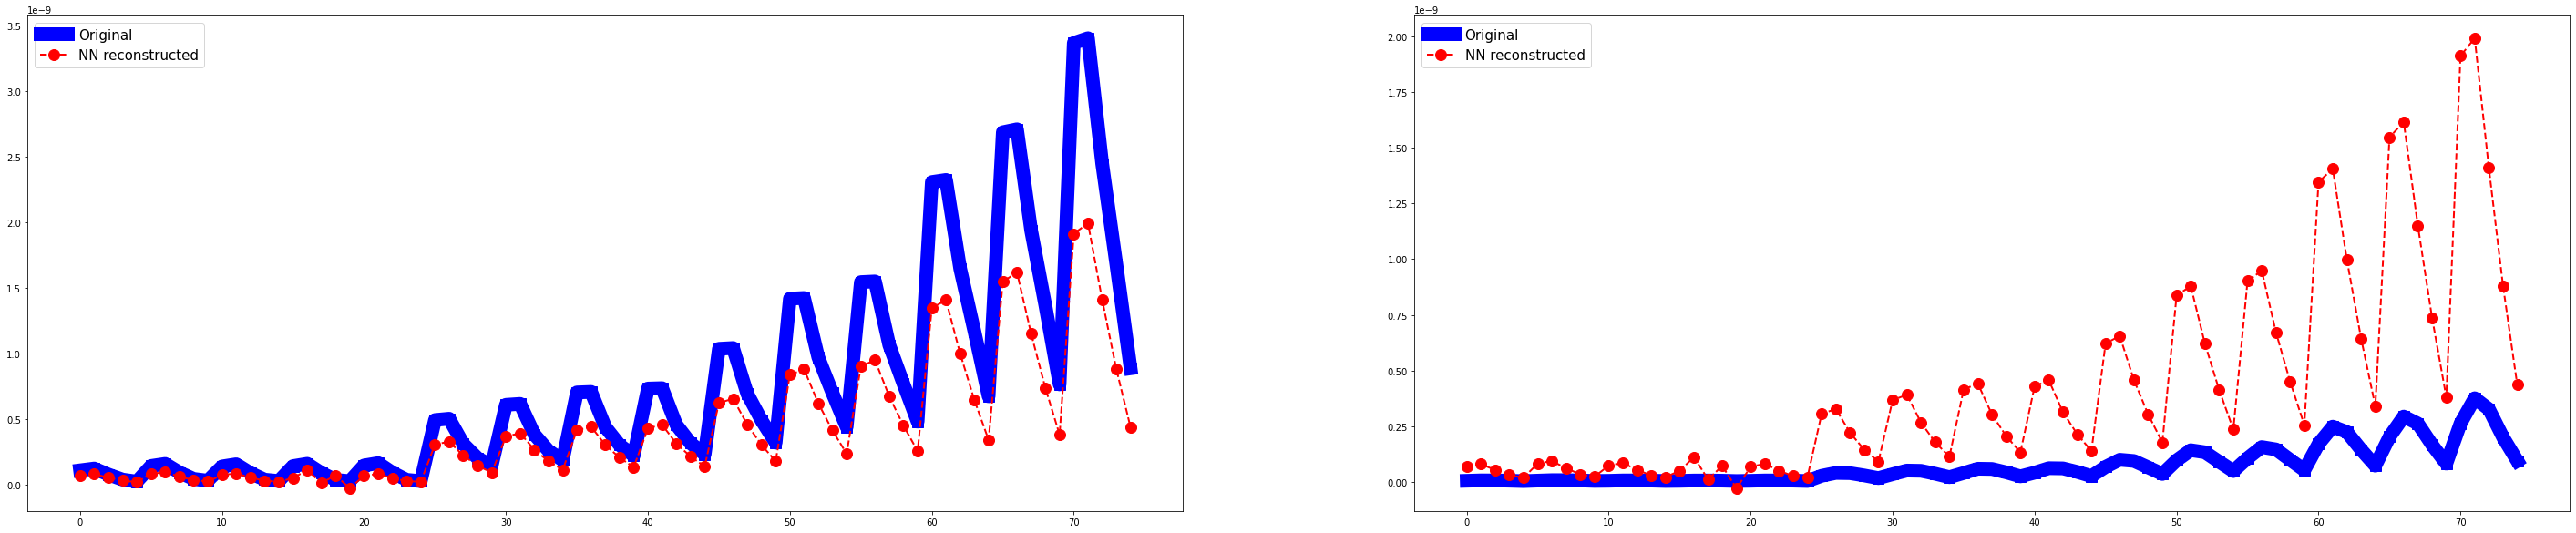

In [70]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
for i in range(2):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('Before_Standardization plot.png')

## COSMOPOWER TRAINING AFTER STANDARDIZATION
- In this section we will train our model. To do this, we will call the method train() from the `cosmopower_NN class`. Here are the input arguments for this function:
- `training_parameters`: as explained above, this is a `dict` of `np.arrays` of `input parameters`. Each `dict` key has a `np.array` of values, for example

In [71]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_na = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [128, 128, 128], # 3 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      )  


Initialized cosmopower_NN model, 
mapping 5 input parameters to 75 output modes, 
using 3 hidden layers, 
with [128, 128, 128] nodes, respectively. 



In [96]:
%%time 
cp_na.train(training_parameters=training_parameters,
                training_features=COSEBIs,
                filename_saved_model='After_COSEBIs_Emodes_emulator',
                # cooling schedule 
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

learning rate = 0.01, batch size = 1024


 13%|███▊                          | 129/1000 [00:04<00:30, 28.88it/s, loss=2.9]


Validation loss = 0.47616553
Model saved.
Reached max number of epochs. Validation loss = 0.47616553
Model saved.
learning rate = 0.001, batch size = 1024


100%|██████████████████████████| 1000/1000 [00:20<00:00, 49.24it/s, loss=0.0176]


Reached max number of epochs. Validation loss = 0.01669107
Model saved.
learning rate = 0.0001, batch size = 1024


 11%|██▊                       | 108/1000 [00:02<00:17, 50.17it/s, loss=0.00934]


Validation loss = 0.008839511
Model saved.
Reached max number of epochs. Validation loss = 0.008839511
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|██▌                       | 100/1000 [00:02<00:18, 49.09it/s, loss=0.00583]


Validation loss = 0.0052369325
Model saved.
Reached max number of epochs. Validation loss = 0.0052369325
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|██▌                       | 100/1000 [00:02<00:22, 40.90it/s, loss=0.00254]


Validation loss = 0.002447034
Model saved.
Reached max number of epochs. Validation loss = 0.002447034
Model saved.
CPU times: user 23.1 s, sys: 3.05 s, total: 26.2 s
Wall time: 31.7 s


## COSMOPOWER TESTING AFTER STANDARDIZATION 
- Aim is to test the created `cosmopower_NN`, by calling its name
- Note that it was saved with `COSEBIs_Emodes_emulator` 

In [97]:
cp_na = cosmopower_NN(restore=True, 
                      restore_filename='After_COSEBIs_Emodes_emulator',
                      ) 

In [98]:
%%time
predicted_COSEBIs = cp_na.predictions_np(test_params)
predicted_COSEBIs 

CPU times: user 4.99 ms, sys: 3.2 ms, total: 8.19 ms
Wall time: 12.8 ms


array([[1.7674341 , 1.72115312, 1.55488886, ..., 1.40261307, 1.52448886,
        1.68969336],
       [0.06363442, 0.08514281, 0.12748552, ..., 0.19382609, 0.18832455,
        0.1919016 ],
       [0.46377987, 0.46567677, 0.45676816, ..., 0.64994829, 0.71197391,
        0.80038699],
       ...,
       [1.0801055 , 1.0446359 , 1.04988237, ..., 0.70323919, 0.58928907,
        0.48131606],
       [1.64085372, 1.68877319, 1.71421363, ..., 1.54324231, 1.58553004,
        1.66544422],
       [1.99947974, 1.82444058, 1.70683035, ..., 0.78154257, 0.57475896,
        0.39646226]])

In [99]:
predicted_COSEBIs[0]

array([1.7674341 , 1.72115312, 1.55488886, 1.27444629, 1.18392293,
       1.91607369, 1.86533377, 1.65660221, 1.25963463, 1.19497403,
       2.07065246, 2.03606676, 1.84681967, 1.31981986, 1.1885469 ,
       2.21507769, 2.19286103, 2.03640371, 1.39747156, 1.1726514 ,
       2.25356628, 2.22842504, 2.1067206 , 1.47012085, 1.20919664,
       1.7275623 , 1.57218891, 1.30448423, 1.2057421 , 1.36854691,
       1.75144441, 1.58131122, 1.30858268, 1.23254539, 1.4072829 ,
       1.77654696, 1.59603762, 1.31153079, 1.24147935, 1.42399851,
       1.78692233, 1.60345639, 1.31471963, 1.2443062 , 1.42778099,
       1.70614651, 1.51838252, 1.30714385, 1.32479742, 1.50054941,
       1.70770739, 1.51168421, 1.32025652, 1.36785293, 1.54542636,
       1.7162323 , 1.51681018, 1.32756571, 1.38048432, 1.55757848,
       1.68940148, 1.49485044, 1.35271784, 1.44922451, 1.62890564,
       1.69700722, 1.50190226, 1.3716337 , 1.47914901, 1.65789893,
       1.70065286, 1.50993073, 1.40261307, 1.52448886, 1.68969

In [100]:
testing_COSEBIs[0]

array([1.76848913, 1.72439605, 1.56310314, 1.28013546, 1.17278666,
       1.91008818, 1.86884061, 1.67135385, 1.26739629, 1.17877884,
       2.06146145, 2.04348062, 1.87493269, 1.34328243, 1.18011992,
       2.20250913, 2.20095521, 2.08412556, 1.45759639, 1.20230044,
       2.24365237, 2.24382764, 2.15537707, 1.52386361, 1.21702423,
       1.72336105, 1.56849436, 1.29562109, 1.1821819 , 1.33744852,
       1.74634872, 1.57721737, 1.29857943, 1.20796528, 1.37736985,
       1.77153003, 1.59269285, 1.3019161 , 1.21688235, 1.39492535,
       1.78225529, 1.60070433, 1.30568173, 1.22014543, 1.39913377,
       1.69987659, 1.51072349, 1.29024662, 1.29719978, 1.47421409,
       1.70154622, 1.50367831, 1.30201306, 1.34094858, 1.52256233,
       1.71042543, 1.50925161, 1.30979822, 1.35439312, 1.53617989,
       1.6836256 , 1.4862612 , 1.33446143, 1.42634663, 1.61725701,
       1.69182645, 1.49425358, 1.35502557, 1.45944282, 1.651752  ,
       1.69673126, 1.5038318 , 1.38907338, 1.51064458, 1.69468

In [101]:
predicted_COSEBIs[2]

array([0.46377987, 0.46567677, 0.45676816, 0.43954605, 0.43516357,
       0.50791313, 0.50908285, 0.50259789, 0.47748182, 0.46360147,
       0.55690425, 0.56208363, 0.57159313, 0.54427765, 0.4971588 ,
       0.61932851, 0.62286839, 0.66264638, 0.65115276, 0.55262534,
       0.6405598 , 0.6579699 , 0.71673221, 0.71551985, 0.57812204,
       0.48736547, 0.48568679, 0.47933361, 0.48176168, 0.50385667,
       0.50433828, 0.50387973, 0.50003708, 0.50506275, 0.52830194,
       0.5181496 , 0.51802462, 0.51407471, 0.5176779 , 0.53970526,
       0.52396599, 0.52441422, 0.520487  , 0.52293596, 0.54356   ,
       0.51763293, 0.52289885, 0.53233636, 0.5555185 , 0.59625547,
       0.5330326 , 0.54166887, 0.5567064 , 0.5863622 , 0.63593062,
       0.54182899, 0.55132109, 0.56756637, 0.5980232 , 0.64892072,
       0.55129222, 0.56698747, 0.5958461 , 0.64319573, 0.71588551,
       0.56439751, 0.58359931, 0.61694534, 0.66946091, 0.74801731,
       0.58315655, 0.60818603, 0.64994829, 0.71197391, 0.80038

In [102]:
testing_COSEBIs[2]

array([0.43925927, 0.44051455, 0.43008119, 0.41100431, 0.41714707,
       0.48703747, 0.48360097, 0.46951723, 0.44444395, 0.44684507,
       0.53936659, 0.53517373, 0.53059845, 0.49852524, 0.47291811,
       0.59991203, 0.59845058, 0.61899888, 0.59172795, 0.51613419,
       0.62958391, 0.63221688, 0.67090707, 0.65224088, 0.54252641,
       0.46746592, 0.46714886, 0.46510308, 0.47917884, 0.51309495,
       0.48636603, 0.48696877, 0.48850146, 0.50536921, 0.53865569,
       0.5009761 , 0.5013666 , 0.50302041, 0.51863311, 0.54974071,
       0.50732187, 0.50780853, 0.50940998, 0.52371694, 0.55311365,
       0.50316446, 0.51272037, 0.53238157, 0.56751632, 0.61313621,
       0.52070663, 0.53434472, 0.56083614, 0.6019594 , 0.65386202,
       0.5299014 , 0.5446344 , 0.57247654, 0.61393601, 0.66659217,
       0.54164343, 0.56475193, 0.60624177, 0.6640613 , 0.73657256,
       0.5562848 , 0.58278717, 0.62873616, 0.69054141, 0.76851642,
       0.57683469, 0.60965126, 0.66388452, 0.73341914, 0.81750

In [103]:
len(predicted_COSEBIs) 

30

In [104]:
len(testing_COSEBIs) 

30

CPU times: user 355 ms, sys: 59.9 ms, total: 415 ms
Wall time: 409 ms


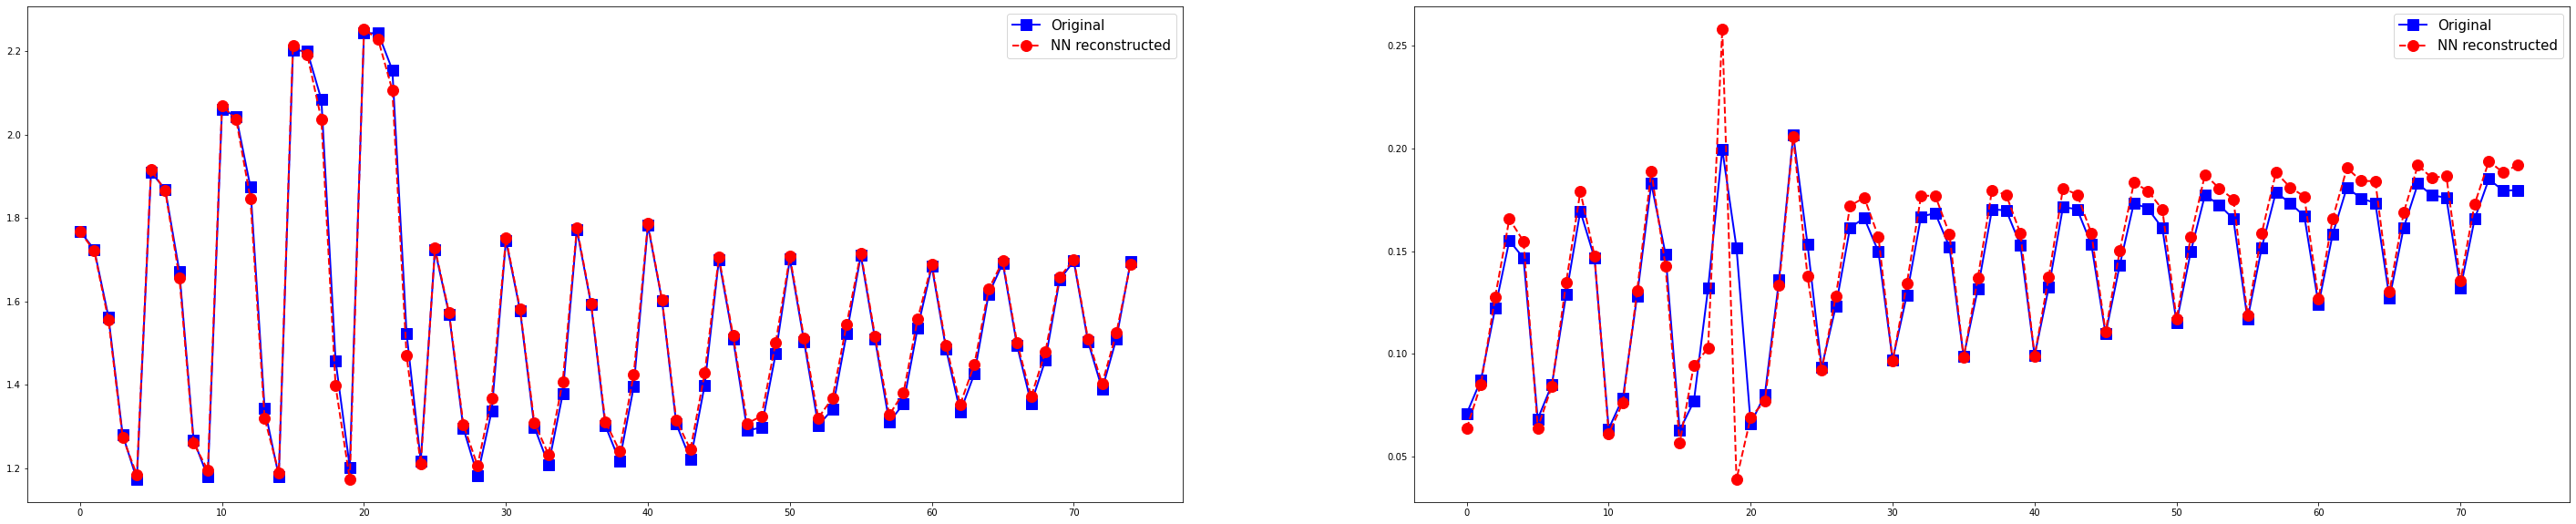

In [105]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
for i in range(2):
    pred = predicted_COSEBIs[i]
    true = testing_COSEBIs[i]
    ax[i].plot(true, 'blue', linewidth=2, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('After Standardization plot.png')

In [106]:
print("number of modes samples: ", cp_nn.parameters)

number of modes samples:  ListWrapper(['omch2', 'ombh2', 'h0', 'n_s', 's8_input'])


In [107]:
print('sampled multipoles: ', cp_nn.modes)
print('number of multipoles: ', cp_nn.n_modes)

sampled multipoles:  ListWrapper([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74])
number of multipoles:  75


### Accuracy
#### Before Standardization
- This to carry how accurate `cosmopower_NN` predict to the test_data

In [108]:
# Mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(testing_COSEBIs_E_modes, predicted_COSEBIs_Emodes, squared=False,)
MSE 

3.566497261408239e-10

In [109]:
# Root mean squared error
rmse = mean_squared_error(testing_COSEBIs_E_modes, predicted_COSEBIs_Emodes, squared=True,)
rmse 

2.7733552428329196e-19

In [110]:
Absolute_mean_error = mean_absolute_error(testing_COSEBIs_E_modes,predicted_COSEBIs_Emodes)
Absolute_mean_error

3.0942041237508464e-10

#### After Standardization
- This to carry how accurate `cosmopower_NN` predict to the test_data

In [111]:
# Mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(testing_COSEBIs, predicted_COSEBIs, squared=False,)
MSE 

0.0830385595705712

In [112]:
# Root mean squared error
rmse = mean_squared_error(testing_COSEBIs, predicted_COSEBIs, squared=True,)
rmse 

0.023838995846268727

In [113]:
Absolute_mean_error = mean_absolute_error(testing_COSEBIs,predicted_COSEBIs)
Absolute_mean_error

0.03529186349693106

### ERROR PLOT AFTER STANDARDIZATION 
- Below plots indicates the MSE error plot and MAE error plot 

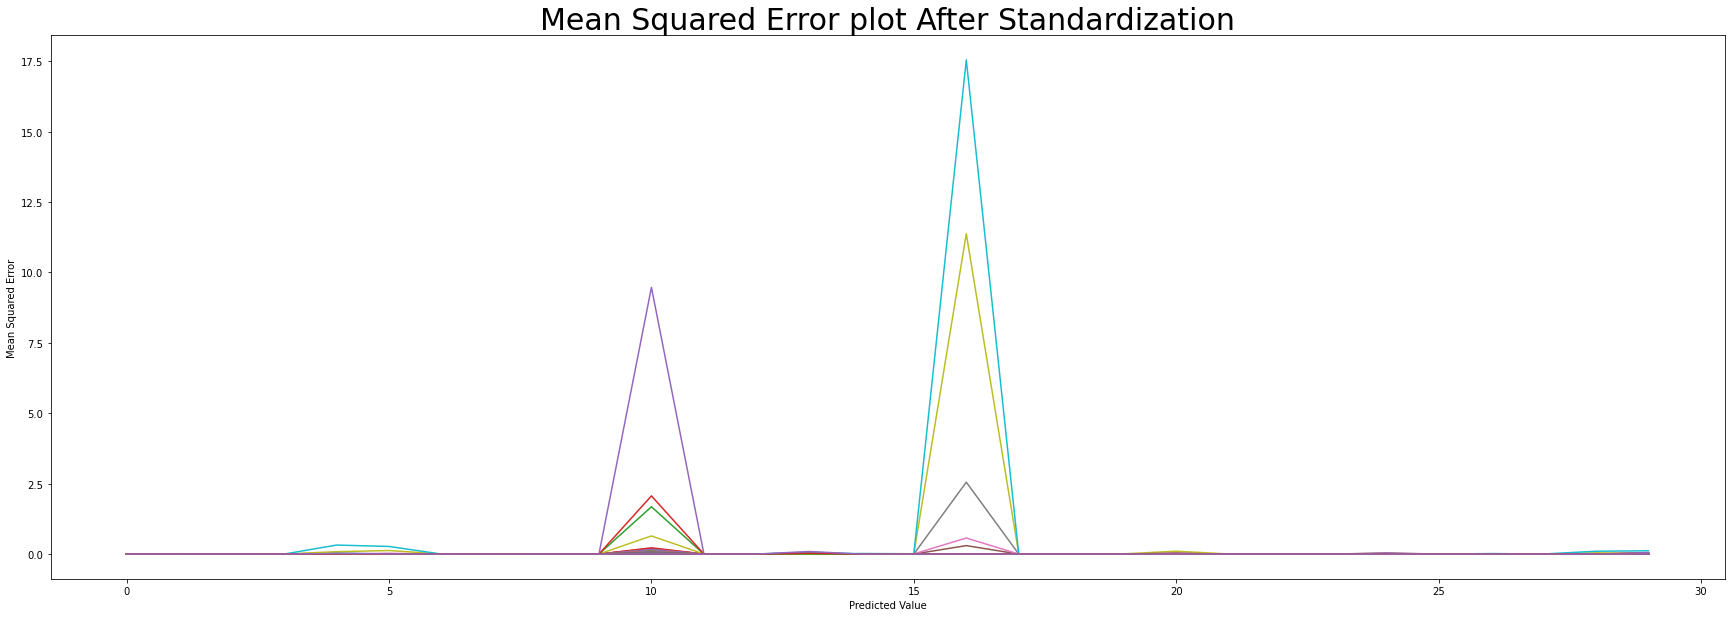

In [114]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/

## Root mean Squared Error Plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs
# predicted value
predicted = predicted_COSEBIs
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10)) 
pyplot.plot(errors)
pyplot.xlabel('Predicted Value')
pyplot.title("Mean Squared Error plot After Standardization", fontsize=30)
pyplot.savefig("After Standardization Error plot.png")
pyplot.ylabel('Mean Squared Error')
pyplot.show() 

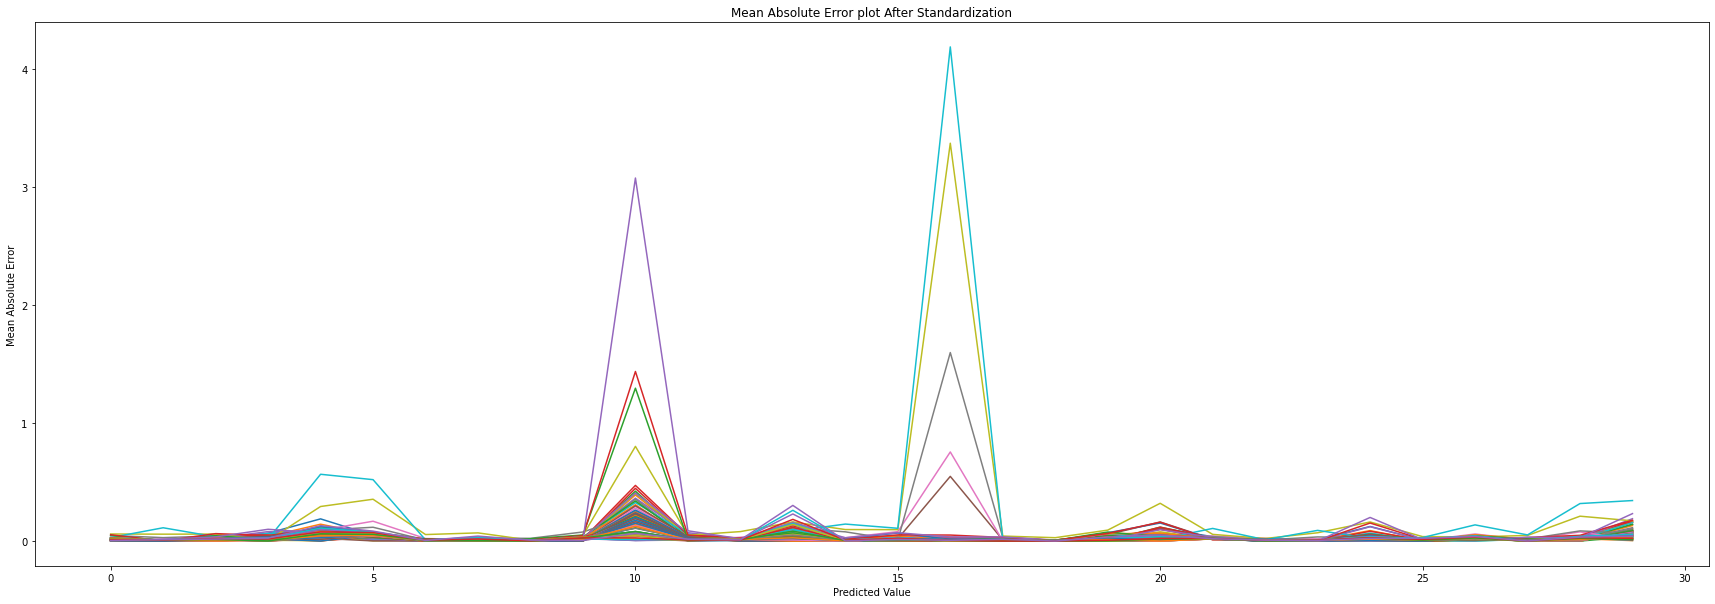

In [115]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs
# predicted value
predicted = predicted_COSEBIs
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10))
pyplot.plot(errors)
pyplot.title("Mean Absolute Error plot After Standardization")
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show() 

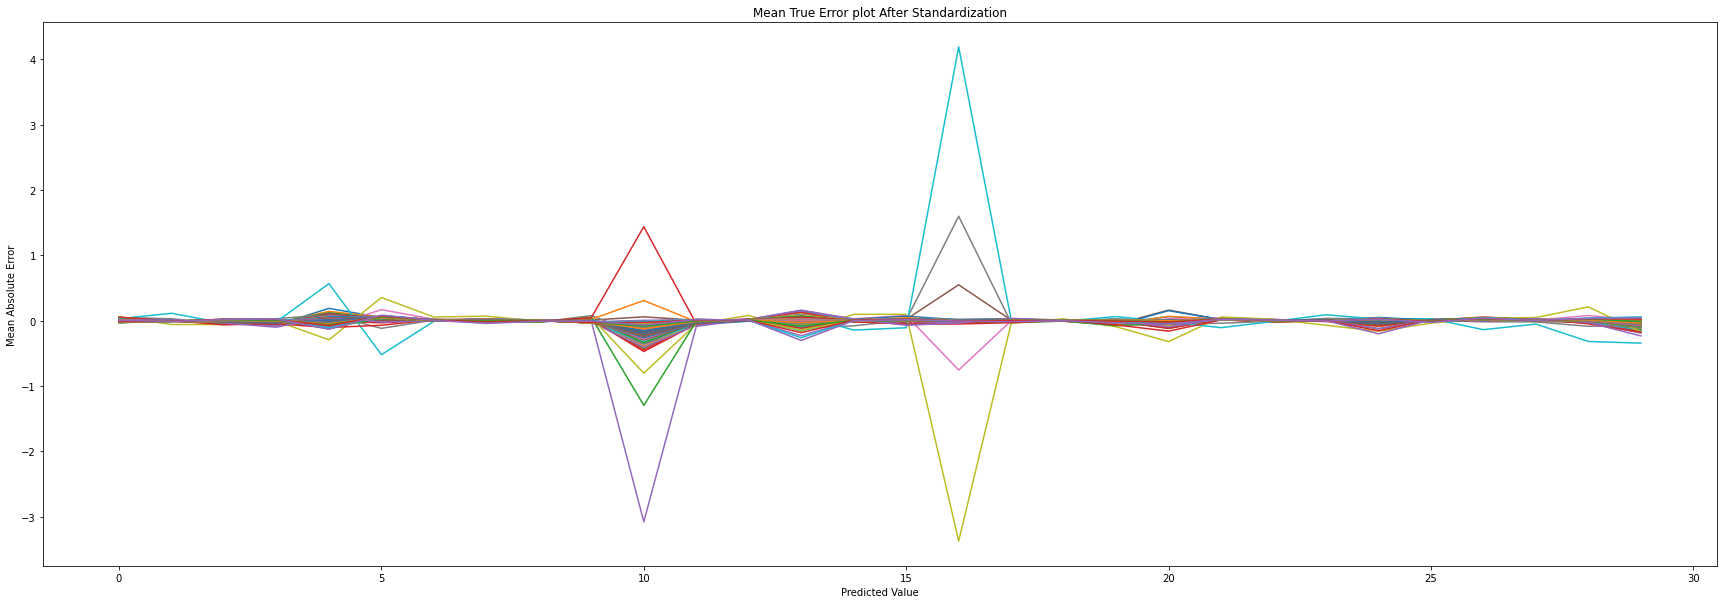

In [116]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs
# predicted value
predicted = predicted_COSEBIs
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = ((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10))
pyplot.plot(errors)
pyplot.title("Mean True Error plot After Standardization")
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show() 

### ERROR PLOT BEFORE STANDARDIZATION 
- Below plots indicates the MSE error plot and MAE error plot 

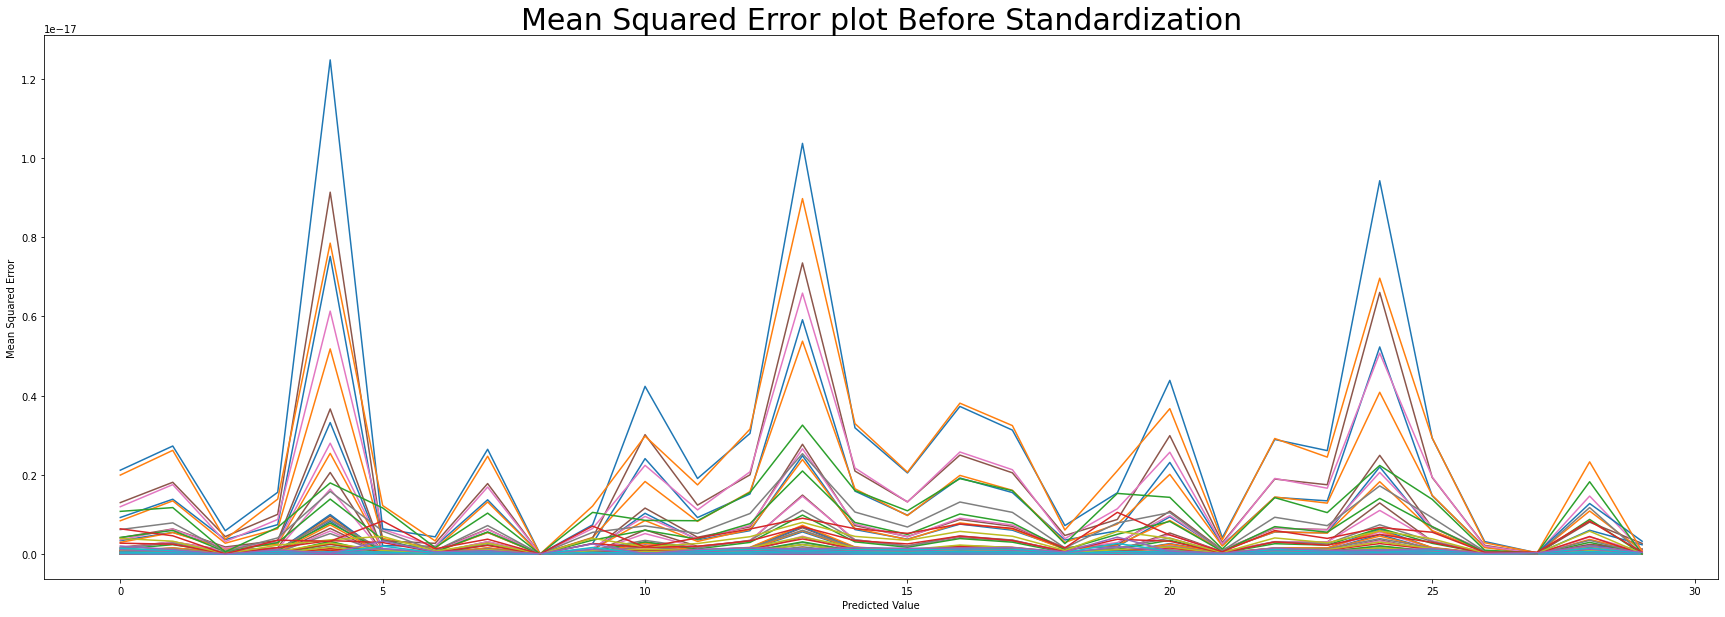

In [117]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/
## Root mean Squared Error Plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs_E_modes
# predicted value
predicted = predicted_COSEBIs_Emodes
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10)) 
pyplot.plot(errors)
pyplot.title("Mean Squared Error plot Before Standardization", fontsize=30)
pyplot.xlabel('Predicted Value')
pyplot.savefig("Before Standardization Error plot.png")
pyplot.ylabel('Mean Squared Error')
pyplot.show()

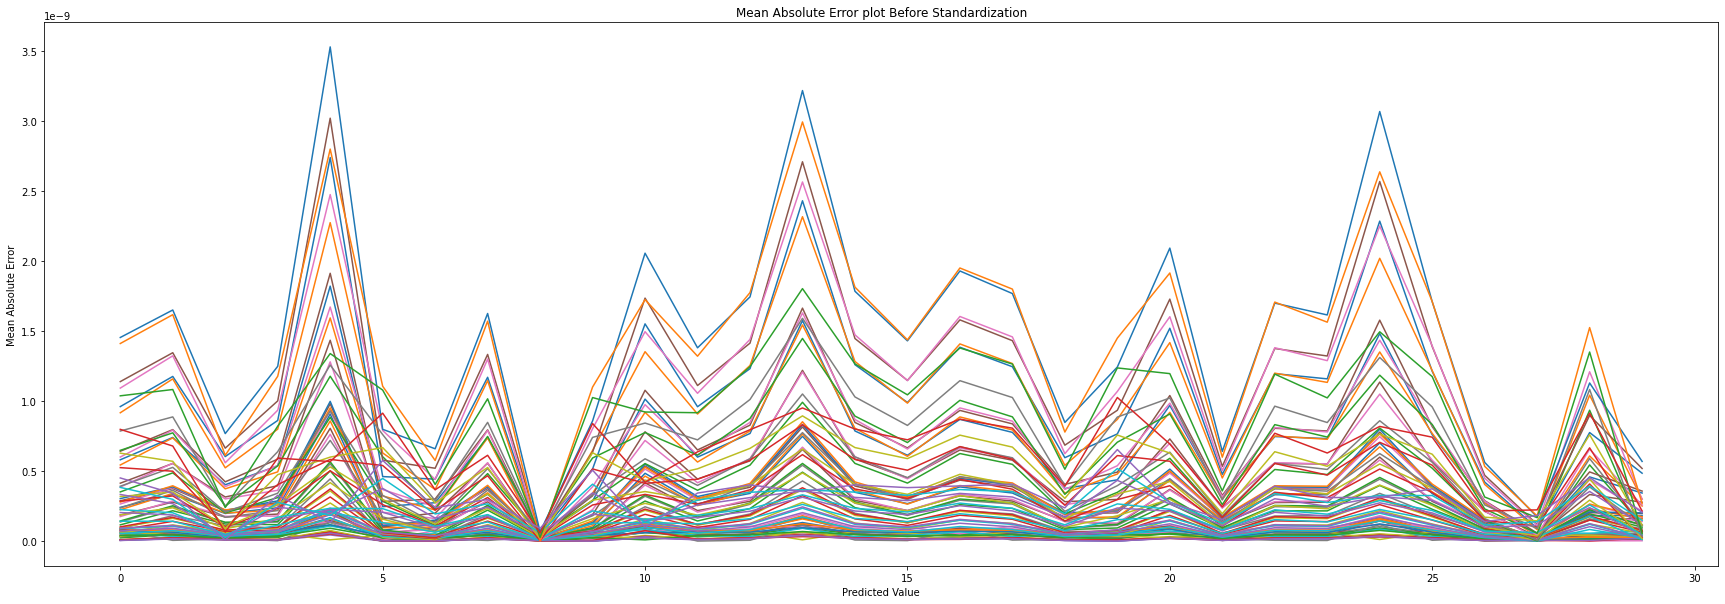

In [118]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs_E_modes
# predicted value
predicted = predicted_COSEBIs_Emodes
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10))
pyplot.plot(errors)
pyplot.title("Mean Absolute Error plot Before Standardization")
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show() 

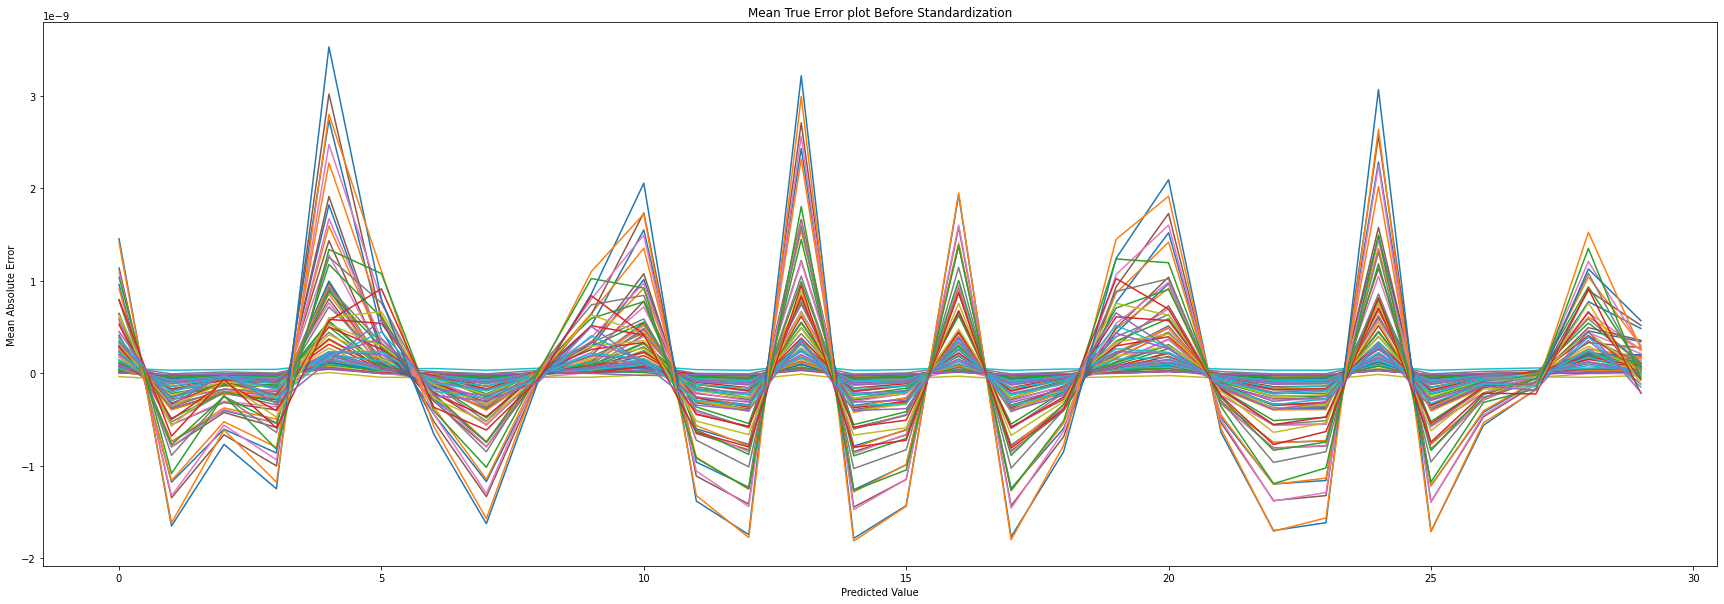

In [119]:
## Code Refrence: https://machinelearningmastery.com/regression-metrics-for-machine-learning/

# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = testing_COSEBIs_E_modes
# predicted value
predicted = predicted_COSEBIs_Emodes
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = ((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
# plot errors
pyplot.figure(figsize=(30, 10))
pyplot.plot(errors)
pyplot.title("Mean True Error plot Before Standardization")
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show() 